In [92]:
import numpy as np
from logistic_regression import *
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../hw1/')
from gradient_descent import GradientDescent, quad, quadGrad
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


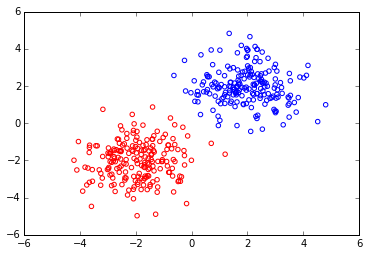

In [93]:
lr = LogisticRegression.fromFile('data_stdev1', type="train")
lr.plotData()

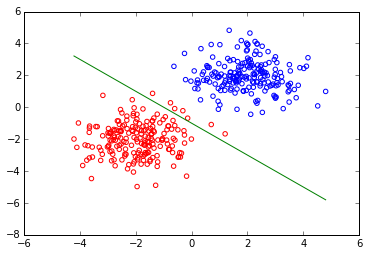

number of entries missclassified
7
missclassification rate
0.0175
[ 16.4171883  -26.45989999 -26.74659391]


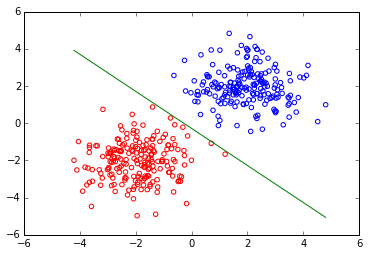

6.0601403649256387

In [102]:
w_full = np.array([1,1,1])
lam = 0
lr.plotData(w_full=w_full)
lr.classificationErrorRate(w_full, verbose=True)
lr.NLL_Reg(w_full, lam)
grad = lr.NLL_Reg_grad(w_full, lam)
print grad
w_new = w_full - 0.03*grad
lr.plotData(w_full=w_new)
lr.NLL_Reg(w_new, lam)

0.02
 
--- Minimization Summary --- 
x_min is = [-1.35308469  5.95175959  6.1125701 ]
f_min is = 0.149719151392
achieved tolerance = -9.999959346e-05
numFunctionCalls = 1280
---------------------------- 
 
(3,)


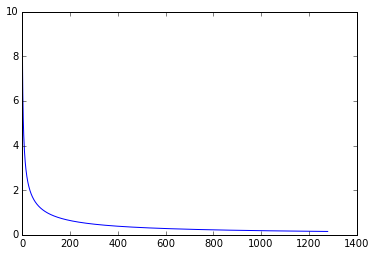

0.149719151392


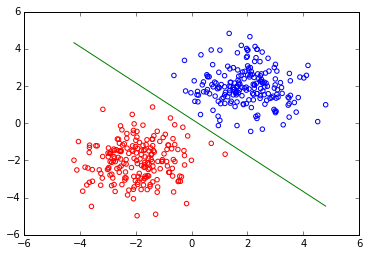

In [119]:
gd = lr.constructGradientDescentObject(lam)
gd.stepSize = 0.02
print gd.stepSize
(w_star,_,_,_) = gd.computeMin(w_full, maxFunctionCalls=10000, storeIterValues=True, printSummary=True)
print np.shape(w_star)
gd.plotIterValues()
print lr.NLL_Reg(w_star, lam)
lr.plotData(w_full=w_star)

In [85]:
lam = 2


f = lambda w_full: lr.NLL_Reg(w_full, lam)
grad = lambda w_full: lr.NLL_Reg_grad(w_full, lam)

gd = GradientDescent(f, grad=grad)

print "analytic gradient"
print gd.evalGradient(w_full)
print "numerical gradient"
print gd.numericalGradient(w_full, dx = 0.0001)

analytic gradient
[ 16.4171883  -22.45989999 -22.74659391]
numerical gradient
[ 16.4171883  -22.45990002 -22.74659394]


In [86]:
t = np.dot(lr.x_full, w_full)
s = np.multiply(lr.y, t)
print np.shape(t)
print np.shape(s)

(400,)
(400,)


In [87]:
1/2.0*np.sum(np.multiply(-lr.y[:,None],lr.x_full), axis=0)

array([   0.        , -389.68541571, -401.53341628])